# Observations and Insights

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
#Combining the data into a single dataset
merg_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#Displaying the data table for preview
merg_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#Checking the number of mice 
merg_df2 = merg_df.loc[:, ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

#Dropping the duplicates
merg_df2 = merg_df2.drop_duplicates(subset=['Mouse ID'])
count = merg_df2['Mouse ID'].count()

#Printing output
pd.DataFrame({'Number Of Mice': [count]})

,Number Of Mice
0,249


In [5]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and TImepoint
merg_df = merg_df[merg_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
#Settin MOuse ID as the index
mouse_data = merg_df.set_index('Mouse ID')
time_point_data = mouse_data["Timepoint"]

#Setting up dataframe
mouse_summary = pd.DataFrame({'Timepoint': time_point_data})

#Printing output
mouse_summary

,Timepoint
Mouse ID,
g989,0
g989,0
g989,5
g989,5
g989,10
g989,10
g989,15
g989,15
g989,20


In [6]:
#Getting all the data for the duplicatemouse ID
dup_df = merg_df[merg_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

#Printing output
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#Creating a clean DataFrame by dropping the duplicate mouse by it's ID
merg_df3 = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merg_df3 = merg_df3[merg_df3.duplicated(subset=['Timepoint'])]

#Setiing the clean dataframe with Mouse ID as the index
mouse_data = merg_df3.set_index('Mouse ID')  

#Printing output
mouse_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [8]:
#Checking the number of mice in the clean DataFrame
mouse_data = merg_df3.loc[:, ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
clean_count = mouse_data['Mouse ID'].nunique()

#Making a dataframe for the clean data
clean_summary_df = pd.DataFrame({'Number Of Mice': [clean_count]})

#Printing output
clean_summary_df

,Number Of Mice
0,248


# Summary Statistics

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_group = mouse_data.groupby('Drug Regimen')

#Generating the mean, median, variance, standard deviation and SEM of the tumor volume
drug_mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
drug_median = drug_regimen_group['Tumor Volume (mm3)'].median()
drug_var = drug_regimen_group['Tumor Volume (mm3)'].var()
drug_st_dev = drug_regimen_group['Tumor Volume (mm3)'].std()
drug_sem = drug_regimen_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
dr_summary_df = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Variance': drug_var, 'Standard Deiation': drug_st_dev, 'SEM': drug_sem})

#Print output
dr_summary_df

,Mean,Median,Variance,Standard Deiation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.577199,41.020724,19.660760,4.434046,0.300311
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_summary = mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})

#Printing output
stat_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.577199  41.020724  19.660760  4.434046  0.300311
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

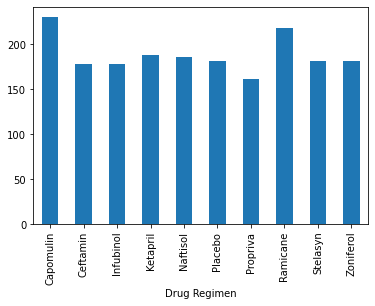

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = merg_df3.groupby('Drug Regimen')['Mouse ID'].count()
#telling it to print as a bar plot
measurements.plot(kind='bar')

#Show output
plt.show()

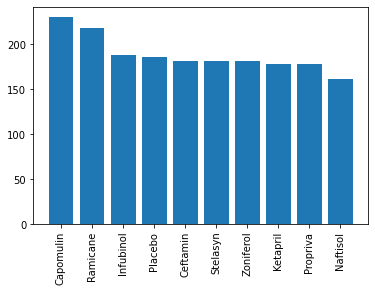

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = mouse_data['Drug Regimen'].unique()
y_axis = mouse_data['Drug Regimen'].value_counts()

#Rotating the names on the x axis to vertical
plt.xticks(rotation='vertical')
#telling it to print as a bar plot
plt.bar(x_axis, y_axis)

#Show output
plt.show()

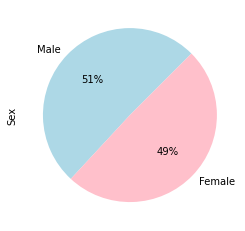

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merg_df3 = pd.merge(mouse_metadata, study_results, on="Mouse ID")
clean_sex_data_df = merg_df3[merg_df3.duplicated(subset=['Timepoint'])]
mouse_data = clean_sex_data_df.set_index('Mouse ID')
pie_df = merg_df3['Sex'].value_counts()

#Setting up the pie plot
pie_df.plot(kind='pie', colors=['lightblue', 'pink'],autopct='%1.0f%%', startangle = 45)

#Show output
plt.show()

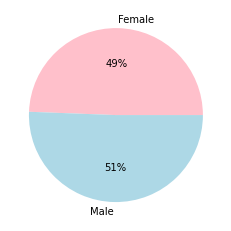

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
merg_df3 = pd.merge(mouse_metadata, study_results, on="Mouse ID")
clean_sex_data_df = merg_df3[merg_df3.duplicated(subset=['Timepoint'])]
mouse_data = clean_sex_data_df.set_index('Mouse ID')

#Grouping by the sex and calculating the mice into each sex
sex = merg_df3.groupby('Sex')['Mouse ID'].count()
labels = list(sex.index)
sex = sex.to_numpy()

#Seting up the pie plot
colors = ['pink', 'lightblue']
plt.pie(sex, labels = labels, colors = colors, autopct='%1.0f%%')

#Show output
plt.show()

# Quartiles, Outliners and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_tp = merg_df3.loc[merg_df3['Drug Regimen'].isin(treatment_names)]
                       
#getting the last (greatest) timepoint for each mouse                       
greatest_time = last_tp.groupby(['Mouse ID'])['Timepoint'].max()
last_time_df2 = pd.merge(greatest_time, last_tp, on=["Mouse ID", "Timepoint"])

#Show output
greatest_time

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [21]:
#merg this group df with the original dataframe to get the tumor volume at the last timepoint
treatments_df = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

#Put treatments into a list for for loop (and later for plot labels)
for treatment in treatments_df:
    df = last_time_df2.loc[last_time_df2['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    #Calculate the IQR and quantitatively determine if there are any potential outliners
    #Locate the row which contain mice on each drug and get the tumor volumes
    #add subset
    tumor_vol.append(df)
    quartiles = df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #Print output
    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_occupancy = df.loc[(df < lower_bound) | (df > upper_bound)]
    outlier_occupancy
    
    #Print output
    print(f'Drug name is - {treatment}, outliers are - {outlier_occupancy}')

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Drug name is - Capomulin, outliers are - Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Drug name is - Ramicane, outliers are - Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Drug name is - Infubinol, outliers are - 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interqua

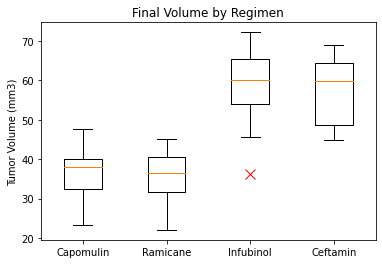

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
flierprops = dict(marker='x', markerfacecolor='r', markersize=10, markeredgecolor='red')
plt.boxplot(tumor_vol, labels=labels, flierprops=flierprops)

#Add in Title and Y label
plt.title('Final Volume by Regimen')
plt.ylabel('Tumor Volume (mm3)')

#Show output
plt.show()

# Line and Scatter Plots

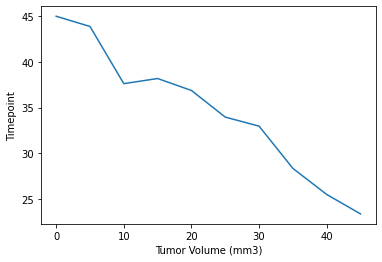

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_a = merg_df3.loc[merg_df3['Drug Regimen'] == 'Capomulin']

#add x and y lables
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')

#Show output
mouse_a
mouseid = mouse_a.loc[mouse_a['Mouse ID'] == 's185']
plt.plot(mouseid['Timepoint'],mouseid['Tumor Volume (mm3)'])

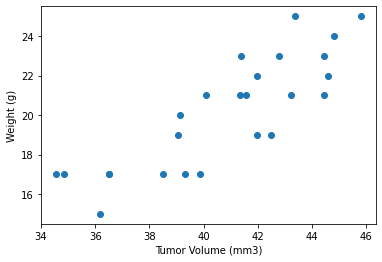

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_b = mouse_a.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merge_mouse = pd.merge(mouse_metadata, mouse_b, on='Mouse ID')     
plt.scatter(merge_mouse['Tumor Volume (mm3)'], merge_mouse['Weight (g)'])

#add x and y lables
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

#Show output
plt.show()                                                                      

# Correlation and Regression

The correlation between both facotrs is 0.84
rsquared is 0.7088568047708721


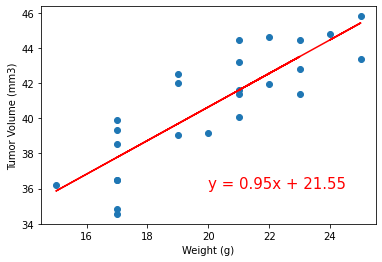

In [19]:
import scipy.stats as sts

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = merge_mouse['Weight (g)']
tumv = merge_mouse['Tumor Volume (mm3)']
correlation = st.pearsonr(tumv, weight)
print(f"The correlation between both facotrs is {round(correlation[0],2)}")

#Add liner regression
x_values = weight
y_values = tumv
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'rsquared is {rvalue**2}')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(20,36),fontsize=15,color='red')

#add x and y lables
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

#Show output
plt.show()